<font color=gray>ADS Sample Notebook.

Copyright (c) 2019 Oracle, Inc.  All rights reserved.
Licensed under the Universal Permissive License v 1.0 as shown at https://oss.oracle.com/licenses/upl.
</font>

***
# <font color=red>Introduction to Dataset Factory Loading </font>
<p style="margin-left:10%; margin-right:10%;">by the <font color=teal> Oracle ADS Team </font></p>

***

## Overview of this Notebook
The most important element in any data science project is the data itself, and the last thing anyone wants to do is try to format data properly to fit some arbitrary mold. We will deomnstrate the robustness of `ADSDataset` to read in every thinkable datatype using the same 1 line command `DatasetFactory.open()`.

In this notebook, you will learn a few of the many ways to read data into a DatasetFactory Object, and then we will demonstrate a bit of the core functionality of the class when preforming exploratory data analysis (EDA). If you wish to learn more about EDA, checkout our [notebook on transforming data](ads_transforming_data_3.ipynb).

## Prerequisites:
 - Experience with specific topic: Novice
 - Professional experience: None
 
This overview is intended for beginners in the fields of statistics, data science and machine learning. No formal professional experience is needed to follow along, but the reader should have some basic knowledge of the programming language Python, and introductory statisitcal terminology. 

## Business Uses:
Datasets are used everywhere in quantitative portions of industries, and each industry has its own standard data formats:
 - A lot of the quantitative finance industry will use pandas.
 - The real estate and manufacturing industries will use Excel.
 - Government data will often be stored as tsv's.

These are overly generalized, and the list goes on, but `ADSDataset` will support all of these and more with the same command.

## Objectives:
By the end of this tutorial, we will know how to:
 - 0. <a href='#setup'>Setup</a> and import all of the required packages for ADS.
 - 1. <a href='#src'>Load in datasets from various sources</a> using Oracle's ADS Dataset Factory class.
     - 1.1 <a href='#cloud'>Oracle Cloud Infrastructure Object Storage</a>
     - 1.2 <a href='#loc'>Local File System</a>
     - 1.3 <a href='#sql'>SQL Server</a>
     - 1.4 <a href='#lib'>Libraries (such as Sklearn)</a>
     - 1.5 <a href='#ddf'>Dask Datasets</a>
 - 2. <a href='#format'>Load in datasets of various format types</a> using Oracle's ADS Dataset Factory class.
     - 2.1 <a href='#arr'>Array-like (list, numpy, etc)</a>
     - 2.2 <a href='#dict'>Dictionary</a>
     - 2.3 <a href='#csv'>CSV</a>
     - 2.4 <a href='#tsv'>TSV</a> (or any arbitrary seperation key)
     - 2.5 <a href='#json'>JSON</a>
     - 2.6 <a href='#hdf'>HDF</a>
     - 2.7 <a href='#pd'>Pandas DataFrame</a>
     - 2.8 <a href='#parquet'>Parquet</a>
     - 2.9 <a href='#libsvm'>Libsvm</a>
 - 3. <a href='#reformat'>Reformat columns</a> of the `ADSDataset` object.
 - 4. <a href='#add'>Add and merge columns</a> or dataframes to your existing dataset.
 - 5. <a href='#target'>Set the target</a> for analysis on your dataset.
 - 6. <a href='#forward'>Moving Forward</a>
 - 7. <a href='#ref'>References</a>
 ***

<a id='setup'></a>
## 0. Setup
Import the necessary packages:

In [27]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import logging
logging.basicConfig(format='%(levelname)s:%(message)s', level=logging.ERROR)

from ads.dataset.factory import DatasetFactory
from ads.dataset.dataset_browser import DatasetBrowser

import ads
ads.set_debug_mode(True)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<a id='src'></a>
## 1. Loading Datasets From Various Sources

Loading data into ADS is painless, and can be done in several different ways. You can load from: a local or network file system, Hadoop Distributed File System, Amazon S3, Google Cloud Service, Oracle Object Storage, Azure Blob, Oracle DB, ADW, elastic search instance, NoSQL DB instance, Mongodb, etc. We will demonstrate just a few of these to stay succint, but it should be easy to generalize to any other.</font>

<a id='cloud'></a>
### Oracle Cloud Infrastructure Object Storage
To begin, let's try importing an artifically generated multiclass classification dataset from Oracle's Cloud Storage. We will use the command `DatasetFactory.open()`-- this will be a theme throughout. To confirm that our data loaded properly, let's print out the first 5 rows using `head()`.

In [28]:
#DatasetFactory.open.__doc__

In [23]:
#xxx = '\n        Returns an object of ADSDataset or ADSDatasetWithTarget  read from the given path\n\n        Parameters\n        ----------\n        source: Union[str, pandas.DataFrame, dask.dataframe.core.DataFrame, h2o.DataFrame]\n            If str, URI for the dataset. The dataset could be read from local or network file system, hdfs, s3 and gcs\n        target: str, optional\n            Name of the target in dataset.\n            If set an ADSDatasetWithTarget object is returned, otherwise an ADSDataset object is returned which can be\n            used to understand the dataset through visualizations\n        format: str, default: infer\n            Format of the dataset.\n            Supported formats: CSV, TSV, Parquet, libsvm, json, Excel, HDF5, SQL, xml,\n            apache server log files (clf, log)\n            By default, the format would be inferred from the ending of the dataset file path.\n        name: str, optional default: ""\n        description: str, optional default: ""\n            Text describing the dataset\n        npartitions: int, optional\n            Number of partitions to split the data\n            By default this is set to the max number of cores supported by the backend compute accelerator\n        type_discovery: bool, default: True\n            If false, the data types of the dataframe are used as such.\n            By default, the dataframe columns are associated with the best suited data types. Associating the features\n            with the disovered datatypes would impact visualizations and model prediction.\n        html_table_index: int, optional\n            The index of the dataframe table in html content. This is used when the format of dataset is html\n        column_names: \'infer\', list of str or None, default: \'infer\'\n            Supported only for CSV and TSV.\n            List of column names to use.\n            By default, column names are inferred from the first line of the file.\n            If set to None, column names would be auto-generated instead of inferring from file.\n            If the file already contains a column header, specify header=0 to ignore the existing column names.\n        sample_max_rows: int, default: 10000, use -1 auto calculate sample size, use 0 (zero) for no sampling\n            Sample size of the dataframe to use for visualization and optimization.\n        positive_class: Any, optional\n            Label in target for binary classification problems which should be identified as positive for modeling.\n            By default, the first unique value is considered as the positive label.\n        types: dict, optional\n            Dictionary of <feature_name> : <data_type> to override the data type of features.\n        transformer_pipeline: datasets.pipeline.TransformerPipeline, optional\n            A pipeline of transformations done outside the sdk and need to be applied at the time of scoring\n        kwargs: additional keyword arguments that would be passed to underlying dask read API\n            See http://docs.dask.org/en/latest/dataframe-api.html#create-dataframes for the list of kwargs supported\n            based on the format of the dataset\n\n        Returns\n        -------\n        dataset : An instance of ADSDataset\n        (or)\n        dataset_with_target : An instance of ADSDatasetWithTarget\n\n        Examples\n        --------\n        >>> ds = DatasetFactory.open("/path/to/data.data", format=\'csv\', delimiter=" ", na_values="n/a",                     skipinitialspace=True)\n        >>> ds = DatasetFactory.open("/path/to/data.csv", target="col_1", prefix="col_",  skiprows=1,                     encoding="ISO-8859-1")\n        >>> ds = DatasetFactory.open("ocis://path/to/data.tsv", column_names=["col1", "col2", "col3"], header=0)\n        >>> ds = DatasetFactory.open("/path/to/data.parquet", engine=\'pyarrow\', types={"col1": "ordinal",                     "col2": "categorical", "col3" : "continuous", "col4" : "float64"})\n        >>> ds = DatasetFactory.open(df, target="class", sample_max_rows=5000, positive_class="yes", npartitions=2)\n        >>> ds = DatasetFactory.open("s3://path/to/data.json.gz", format="json", compression="gzip", orient="records")\n        '
#xxx.strip().rstrip().lstrip()

In [57]:
ds = DatasetFactory.open("data/multiclass_fk_10k.csv")
ds.head()

Initializing:0.000s
Loading data:0.202s


Generating data sample:0.122s
Building dataset with no target:0.036s
Running data type discovery:0.783s
Calculating co-correlation of features:0.026s


F1 F2 F3 F4 F5        F6        F7        F8        F9       F10  ...  \
0  b  b  c  c  d  1.282186 -0.259446  0.700019  0.592523  0.231988  ...   
1  a  b  b  d  c -2.042793  0.403880  1.117152 -2.524331  3.757502  ...   
2  b  c  c  c  c -4.985643 -0.570964 -0.790488 -3.992835  0.947038  ...   
3  b  b  c  c  c  2.285811  0.813573  1.122525 -3.368970  0.731400  ...   
4  a  b  c  d  e -4.485196  5.642070  0.473727  0.675435  1.531177  ...   

        F12       F13       F14       F15       F16       F17       F18  \
0 -0.918506  4.171743 -0.352189 -0.223027 -5.780742 -0.360367  1.092207   
1  4.532158  0.584930 -1.900248 -1.712626  1.278657 -1.071014 -2.052394   
2  3.298321  3.776286  1.026382 -0.538980 -1.257692 -3.146687 -1.682954   
3  0.740991  2.050949 -2.839865  1.865850  1.803181  0.589550 -3.917337   
4  7.007785 -0.643270  0.288049 -1.598959  0.228206 -2.256328 -1.473266   

        F19       F20  Labels  
0 -1.231134  1.075482       1  
1 -1.676309 -2.891747       0  
2  0.741691 -1.020478       0  
3 -2.019100  0.597268       2  
4  1.269979 -2.843203       2  

[5 rows x 21 columns]

In [34]:
#DatasetFactory.open.__doc__

<font color=gray> More Details on the Outputs: 
- <font color=gray><a href='#target'>"Building dataset with no target" </a>
- <font color=gray><a href='#add'>"Running data type discovery"</a>

We can use the funciton show_in_notebook() to get summary statistics, correlations, visualizations, and the first 5 rows of our dataset. Let's try this in the following cell:

In [6]:
ds.show_in_notebook()

Accordion(children=(HTML(value='<h1>Name: multiclass_fk_10k.csv</h1><h3>Type: ADSDataset</h3><h3>10,000 Rows, …

<a id='local'></a>
### Local Storage
Next let's try reading something locally. First we will have to create a csv locally. Then we will run our simple open command and confirm that the data is the same by comparing the shape and the first 5 rows.

In [58]:
import os
# Generate CSV of our data
[ds_link] = ds.to_csv("./tmp_multiclass.csv")

In [36]:
# Load data using DatasetFactory
ds_from_local = DatasetFactory.open(ds_link, index_col='Unnamed: 0')
os.remove("./tmp_multiclass.csv")
ds_from_local.head()

Initializing:0.000s
Loading data:0.153s


Generating data sample:0.131s
Building dataset with no target:0.031s
Running data type discovery:0.742s
Calculating co-correlation of features:0.023s


F1 F2 F3 F4 F5        F6        F7        F8        F9       F10  ...  \
0  b  b  c  c  d  1.282186 -0.259446  0.700019  0.592523  0.231988  ...   
1  a  b  b  d  c -2.042793  0.403880  1.117152 -2.524331  3.757502  ...   
2  b  c  c  c  c -4.985643 -0.570964 -0.790488 -3.992835  0.947038  ...   
3  b  b  c  c  c  2.285811  0.813573  1.122525 -3.368970  0.731400  ...   
4  a  b  c  d  e -4.485196  5.642070  0.473727  0.675435  1.531177  ...   

        F12       F13       F14       F15       F16       F17       F18  \
0 -0.918506  4.171743 -0.352189 -0.223027 -5.780742 -0.360367  1.092207   
1  4.532158  0.584930 -1.900248 -1.712626  1.278657 -1.071014 -2.052394   
2  3.298321  3.776286  1.026382 -0.538980 -1.257692 -3.146687 -1.682954   
3  0.740991  2.050949 -2.839865  1.865850  1.803181  0.589550 -3.917337   
4  7.007785 -0.643270  0.288049 -1.598959  0.228206 -2.256328 -1.473266   

        F19       F20  Labels  
0 -1.231134  1.075482       1  
1 -1.676309 -2.891747       0  
2  0.741691 -1.020478       0  
3 -2.019100  0.597268       2  
4  1.269979 -2.843203       2  

[5 rows x 21 columns]

In [37]:
# compare the shapes -- it's a match
[ds_from_local.shape, ds.shape]

[(10000, 21), (10000, 21)]

<a id='sql'></a>
### SQL Server
Next we will write to and read from a sql server. Here we will create an artificial dataset with pandas and store it in our sql server.

In [39]:
import pandas as pd
from sqlalchemy import create_engine
engine = create_engine('sqlite:///users.db', echo=False)
df = pd.DataFrame({'name' : ['User 1', 'User 2', 'User 3'], 'id': [1,2,3], 'location': ['TX', 'CA', 'KT']})
df.to_sql('User', con=engine, if_exists="replace")

Let's load our data back out and confirm that it looks good.

In [40]:
ds_new = DatasetFactory.open('sqlite:///users.db', table="User", index_col='id', target="location")
ds_new.head()

Initializing:0.000s
Loading data:0.119s


Generating data sample:0.048s
Building dataset:0.100s
Running data type discovery:0.084s
Calculating co-correlation of features:0.070s


index    name location
id                        
1       0  User 1       TX
2       1  User 2       CA
3       2  User 3       KT

<a id='lib'></a>
### Libraries (such as Sklearn)
`DatasetBrowser` allows us to reference libraries and index websites which store several datasets, and load the ones we desire. We can check which libraries are supported using the `list()` function.

In [41]:
DatasetBrowser.list()

['web', 'sklearn', 'seaborn', 'R']

In [56]:
files = DatasetBrowser.filesystem('/home/datascience/ads-examples/data')
files.list()

['earthquake_01 (csv/4 kb)',
 'multiclass_fk_10k (csv/2943 kb)',
 'orcl_attrition (csv/238 kb)',
 'oracle_transportation_dataset_50k (csv/11291 kb)',
 'oracle_traffic_timeseries_dataset1 (csv/5159 kb)',
 'oracle_fraud_dataset1 (csv/192579 kb)',
 'oracle_classification_dataset1_150K (csv/114801 kb)']

Let's look at the Sklearn Datasets:

In [42]:
sklearn = DatasetBrowser.sklearn()
sklearn.list()

['boston', 'breast_cancer', 'diabetes', 'iris', 'wine', 'digits']

Now that we have them listed out, let's explore the wine dataset

In [43]:
ds = sklearn.open('wine')
ds.show_in_notebook()

Initializing:0.000s
Loading data:0.062s


Generating data sample:0.061s
Building dataset:0.081s
Running data type discovery:0.263s
Calculating co-correlation of features:0.042s


Accordion(children=(HTML(value='<h1>Name: wine</h1><h3>Type: MultiClassClassificationDataset</h3><pre>.. _wine…

<a id='ddf'></a>
### Dask Datasets
Dask also has builtin datasets which are easy to load using our favorite `DatasetFactory.open()` function. Let's load in a timeseries dataset and print out the first 5 rows.

In [4]:
from dask.datasets import timeseries
ds = DatasetFactory.open(timeseries(), "y")
ds.head()

Initializing:0.000s
Loading data:1.494s


Generating data sample:0.610s
Building dataset:0.085s
Running data type discovery:0.336s
Calculating co-correlation of features:0.084s


id     name         x         y
timestamp                                             
2000-01-01 00:00:00   958  Norbert -0.972607 -0.088361
2000-01-01 00:00:01   989      Ray  0.527677 -0.343663
2000-01-01 00:00:02  1045    Kevin  0.828599 -0.837621
2000-01-01 00:00:03  1029    Frank  0.663033  0.764044
2000-01-01 00:00:04  1006    Zelda  0.611008  0.112044

<a id='format'></a>
## 2. Datasets of Various Format Types

In adition to the variety of hosts, we can load data from a variety of formats: CSV, TSV, Parquet, libsvm, json, Excel, HDF5, SQL, xml, apache server log files (clf, log)). We will explore a few of these in the following cells.

<a id='arr'></a>
### Array-Like
Anything array-like can be first converted into a pandas dataframe, then opened using dataset factory. We will generate a dataset in the following cell, and then convert it into an `ADSDataset` using the same `open()` function.

In [13]:
generated_data_arr = [["ID", "Name", "GPA"], 
                     [1, "Bob", 3.7], 
                     [2, "Sam", 4.3], 
                     [3, "Erin", 2.6]]
generated_df1 = pd.DataFrame(generated_data_arr[1:], columns=generated_data_arr[0])
generated_ds1 = DatasetFactory.open(generated_df1)
generated_ds1.head()

Initializing:0.000s
Loading data:0.027s


Generating data sample:0.023s
Building dataset with no target:0.020s
Running data type discovery:0.034s
Calculating co-correlation of features:0.005s


ID  Name  GPA
0   1   Bob  3.7
1   2   Sam  4.3
2   3  Erin  2.6

<a id='dict'></a>
### Dictionary
We will do the same as the previous cell, but this time from a dictionary.

In [14]:
generated_data_dict = {"ID": [1.1, 2.0, 3.0], 
                       "Name": ["Bob", "Sam", "Erin"],
                       "GPA": [3.7, 4.3, 2.6]}
generated_df2 = pd.DataFrame(generated_data_dict)
generated_ds2 = DatasetFactory.open(generated_df2)
generated_ds2.head()

Initializing:0.000s
Loading data:0.033s


Generating data sample:0.021s
Building dataset with no target:0.024s
Running data type discovery:0.038s
Calculating co-correlation of features:0.008s


ID  Name  GPA
0  1.1   Bob  3.7
1  2.0   Sam  4.3
2  3.0  Erin  2.6

<a id='csv'></a>
### CSV
Any `csv` file can be opened using the standard parameterless call to `open()`.

In [15]:
ds = DatasetFactory.open("data/multiclass_fk_10k.csv")
ds.head()

Initializing:0.000s
Loading data:0.167s


Generating data sample:0.081s
Building dataset with no target:0.021s
Running data type discovery:0.451s
Calculating co-correlation of features:0.023s


F1 F2 F3 F4 F5        F6        F7        F8        F9       F10  ...  \
0  b  b  c  c  d  1.282186 -0.259446  0.700019  0.592523  0.231988  ...   
1  a  b  b  d  c -2.042793  0.403880  1.117152 -2.524331  3.757502  ...   
2  b  c  c  c  c -4.985643 -0.570964 -0.790488 -3.992835  0.947038  ...   
3  b  b  c  c  c  2.285811  0.813573  1.122525 -3.368970  0.731400  ...   
4  a  b  c  d  e -4.485196  5.642070  0.473727  0.675435  1.531177  ...   

        F12       F13       F14       F15       F16       F17       F18  \
0 -0.918506  4.171743 -0.352189 -0.223027 -5.780742 -0.360367  1.092207   
1  4.532158  0.584930 -1.900248 -1.712626  1.278657 -1.071014 -2.052394   
2  3.298321  3.776286  1.026382 -0.538980 -1.257692 -3.146687 -1.682954   
3  0.740991  2.050949 -2.839865  1.865850  1.803181  0.589550 -3.917337   
4  7.007785 -0.643270  0.288049 -1.598959  0.228206 -2.256328 -1.473266   

        F19       F20  Labels  
0 -1.231134  1.075482       1  
1 -1.676309 -2.891747       0  
2  0.741691 -1.020478       0  
3 -2.019100  0.597268       2  
4  1.269979 -2.843203       2  

[5 rows x 21 columns]

<a id='tsv'></a>
### TSV
A `tsv` file, or a file with any arbitrary seperation key, can be loaded in the same way. We will deomnstrate this in the following cells

In [16]:
f = open("tmp_random_ds99.tsv","w+")
f.write('1 \t 2 \t 3 \t 4 \t 5 \t 6 \n 1.1 \t 2.1 \t 3.1 \t 4.1 \t 5.1 \t 6.1')
f.close()

In [17]:
ds = DatasetFactory.open("tmp_random_ds99.tsv", column_names=['a','b','c','d','e','f'])
ds.head()

Initializing:0.000s
Loading data:0.058s


Generating data sample:0.037s
Building dataset with no target:0.028s
Running data type discovery:0.057s
Calculating co-correlation of features:0.016s


a    b    c    d    e    f
0  1.0  2.0  3.0  4.0  5.0  6.0
1  1.1  2.1  3.1  4.1  5.1  6.1

In [18]:
os.remove('tmp_random_ds99.tsv')

<a id='json'></a>
### JSON
A Json file can also be read. We will build a Json file, then load it in over the following cells.

In [19]:
# build json file
[ds_link] = ds.to_json("tmp_random_ds99.json", orient='index')
ds_link

'tmp_random_ds99.json0'

In [20]:
# load json file
ds_copy = DatasetFactory.open(ds_link, format='json', orient='index')
ds_copy.head()

Initializing:0.000s
Loading data:0.105s


Generating data sample:0.031s
Building dataset with no target:0.038s
Running data type discovery:0.086s
Calculating co-correlation of features:0.012s


a    b    c    d    e    f
0  1.0  2.0  3.0  4.0  5.0  6.0
1  1.1  2.1  3.1  4.1  5.1  6.1

In [21]:
os.remove(ds_link)

<a id='hdf'></a>
### HDF
An hdf file can be loaded. We will build an hdf file, then load it in over the following cells.

In [22]:
[ds_loc] = ds.to_hdf("tmp_random_ds99.h5", key='df')
ds_loc

'tmp_random_ds99.h5'

In [23]:
ds_copy = DatasetFactory.open(ds_loc, key='df')
ds_copy.head()

Initializing:0.000s
Loading data:0.132s


Generating data sample:0.039s
Building dataset with no target:0.032s
Running data type discovery:0.100s
Calculating co-correlation of features:0.011s


a    b    c    d    e    f
0  1.0  2.0  3.0  4.0  5.0  6.0
1  1.1  2.1  3.1  4.1  5.1  6.1

In [24]:
os.remove(ds_loc)

<a id='pd'></a>
### Pandas
As demonstrated throughout this notebook, any pandas dataframe can be loaded using the `open()` function.

In [25]:
pd_df = ds.to_pandas_dataframe()
ds_copy = DatasetFactory.open(pd_df)
ds_copy.head()

Initializing:0.000s
Loading data:0.034s


Generating data sample:0.020s
Building dataset with no target:0.022s
Running data type discovery:0.074s
Calculating co-correlation of features:0.011s


a    b    c    d    e    f
0  1.0  2.0  3.0  4.0  5.0  6.0
1  1.1  2.1  3.1  4.1  5.1  6.1

<a id='parquet'></a>
### Parquet
A parquet file can be read. We will build a parquet file, then load it over the following cells.

In [59]:
ds.to_parquet("tmp_random_ds99")

In [ ]:
ds = DatasetFactory.open("data/multiclass_fk_10k.csv")
ds.to_parquet("tmp_random_ds99")

In [27]:
ds_copy = DatasetFactory.open("tmp_random_ds99", format='parquet')
ds_copy.head()

Initializing:0.000s
Loading data:1.537s


Generating data sample:0.067s
Building dataset with no target:0.024s
Running data type discovery:0.064s
Calculating co-correlation of features:0.009s


a    b    c    d    e    f
0  1.0  2.0  3.0  4.0  5.0  6.0
1  1.1  2.1  3.1  4.1  5.1  6.1

In [28]:
import shutil
shutil.rmtree('tmp_random_ds99')

`ADSDatasetFactory` also supports __libsvm__, __h20__,    __XGB Matrix___,    __xml__,    __xls__,    __xlsx__,    __clf__,    __log__,    __html__,    and many more. 

<a id='reformat'></a>
## 3. Reformatting Columns

Now let's go through a couple simple ways to clean up and reformat your data. Here we will go through renaming, casting, and altering columns in an example dataset. We will use the student example dataset from earlier:

In [29]:
data = [["ID", "Name", "GPA"], 
        [1, "Bob", 3.7], 
        [2, "Sam", 4.3], 
        [3, "Erin", 2.6]]
df = pd.DataFrame(data[1:], columns=data[0])
ds = DatasetFactory.open(df)

Initializing:0.000s
Loading data:0.033s


Generating data sample:0.022s
Building dataset with no target:0.020s
Running data type discovery:0.034s
Calculating co-correlation of features:0.011s


### Renaming Columns
To start, let's change the column names in the following cells. We want to change `ID` to `Studnt_ID`, so that our dataset is more descriptive.

In [30]:
ds.columns

Index(['ID', 'Name', 'GPA'], dtype='object')

In [31]:
ds = ds.rename_columns({ds.columns[0]: "Student ID"})

In [32]:
ds.columns

Index(['Student_ID', 'Name', 'GPA'], dtype='object')

In [33]:
ds.head()

Student_ID  Name  GPA
0           1   Bob  3.7
1           2   Sam  4.3
2           3  Erin  2.6

### Altering Data in Columns
Now that our feature name has changed to 'Student ID', let's generalize our ID number's to start at 1000.

In [34]:
ds.feature_types['Student_ID']['type']

'ordinal'

In [35]:
ds = ds.assign_column("Student_ID", lambda x:  int(x+1000))

In [36]:
ds.head()

Student_ID  Name  GPA
0        1001   Bob  3.7
1        1002   Sam  4.3
2        1003  Erin  2.6

### Altering Data Types
Next, lets change our student IDs to be categorical instead of ordinal, so that we can append a school ID token to the front. Over the next few cells we will demonstrate how to manually chnge the data type.

In [37]:
ds.feature_types['Student_ID']['type']

'ordinal'

In [38]:
ds = ds.astype({'Student_ID': 'categorical'})

In [39]:
ds.feature_types['Student_ID']['type']

'categorical'

### String Operations on Columns
Finally, we can append our school ID token to the front of the ID number.

In [40]:
ds = ds.assign_column("Student_ID", lambda x:  "HS_" + str(x))

In [41]:
ds.head()

Student_ID  Name  GPA
0    HS_1001   Bob  3.7
1    HS_1002   Sam  4.3
2    HS_1003  Erin  2.6

<a id='add'></a>

## 4. Adding and Merging Columns

Now that we have our dataset formatted properly, we want to see which students are going to make Honors. Let's merge in a new DataFrame that has only 1 column: "Honors". Then we will populate this column with a boolean (True/False) reporting if the student has made honors.

In the following cell, create a new DataFrame called Honors that contains the same data as GPA:

In [42]:
new_col = pd.DataFrame({"Honors": ds["GPA"].compute()})

We will merge the 2 dataframes and show the result:

In [43]:
ds = ds.merge(new_col)
ds.head()

Initializing:0.038s


Sampling data:0.017s
Building dataset with no target:0.020s
Running data type discovery:0.052s


Student_ID  Name  GPA  Honors
0    HS_1001   Bob  3.7     3.7
1    HS_1002   Sam  4.3     4.3
2    HS_1003  Erin  2.6     2.6

Now that we have our dataset established, let's compute the Honors column:

In [44]:
ds = ds.assign_column("Honors", lambda x: x is None or x>3.5)
ds.head()

Student_ID  Name  GPA  Honors
0    HS_1001   Bob  3.7    True
1    HS_1002   Sam  4.3    True
2    HS_1003  Erin  2.6   False

<a id='target'></a>

## 5. Set Target
In this section we will look at datasets with set targets. When datasets have their targets set, several more features are available: more target specific plotting, problem type interpretation, and positive class detection, to name a few.

In the following cell, set the target to be the "Honors" column we just created. 

In [45]:
ds = ds.set_target("Honors")

Here we are trying to predict if someone has honors, which means that the positive class label is "True". In other words, we are trying to predict the "True" labels in the Honors column. If we were trying to predict the False label (or any other label), we can set that with ds_with_target.set_positive_class(False).

In the following cell, we will plot our target column, followed by GPA against our target:

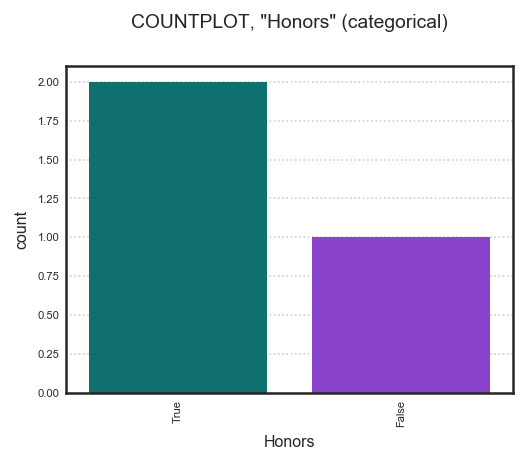

In [46]:
ds.target.show_in_notebook()

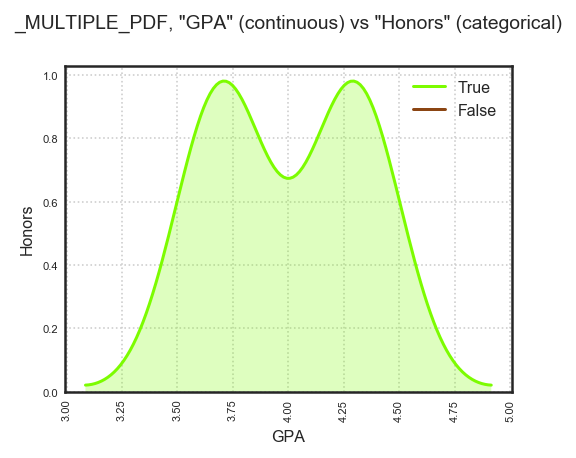

In [47]:
ds.target.show_in_notebook(feature_names=["GPA"])

ADS Dataset will recognize the problem type for you, so that all other autonomous systems know, such as an AutoML package:

In [48]:
type(ds)

ads.dataset.classification_dataset.BinaryClassificationDataset

If we change the target, the type changes as well. In the following cell, if we change the target to GPA, the problem is inferred to be a Regression type.

In [49]:
ds_regression = ds.set_target("GPA")
type(ds_regression)

ads.dataset.regression_dataset.RegressionDataset

## 6. Moving Forward

Dataset Factory is a powerful tool, which can be used for all data science problems. It only takes a few lines of code to perform some very sophisticated analysis. Now that we understand it, we are ready to look indepth at more [data transformations and feature engineering with ADS](ads_transforming_data_3.ipynb).

<a id='ref'></a>

## 7. References
 - <a href="https://www.oracle.com/database/technologies/datawarehouse-bigdata/machine-learning.html">Oracle ADS</a>